In [5]:
import pandas as pd
import numpy as np

In [6]:
def write_ans(y):
        import csv
        with open('y_test.csv','w',newline="") as f:
                writer = csv.writer(f)
                writer.writerow(["PassengerId","Survived"])
                x = np.arange(892,1310)
                writer.writerows(np.c_[x,y])

In [7]:
def format(table):
    
    table['Age'] = table["Age"].fillna(30)
    table["Embarked"] = table["Embarked"].fillna('S')
    table["Fare"] = table["Fare"].fillna(10)
    
    table = table.drop(["Name"],axis=1)
    table = table.drop(["Ticket"],axis=1)
    table = table.drop(["Cabin"],axis=1)
    table = table.drop(["PassengerId"],axis=1)
    
    table.loc[table["Sex"]=="male",["Sex"]]=0
    table.loc[table["Sex"]=="female",["Sex"]]=1
    
    table.loc[table["Embarked"]=="C",["Embarked"]] = 0
    table.loc[table["Embarked"]=="S",["Embarked"]] = 1
    table.loc[table["Embarked"]=="Q",["Embarked"]] = 2
    
    
    return table


In [8]:
from sklearn.model_selection import train_test_split

table_train = pd.read_csv("titanic/train.csv")
table_train = format(table_train)
y = table_train["Survived"]
X = table_train.drop(["Survived"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

FileNotFoundError: [Errno 2] No such file or directory: 'titanic/train.csv'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tree_clf = RandomForestClassifier(max_depth=5)
log_clf = LogisticRegression()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lf',log_clf),('rf',tree_clf),('svm',svm_clf)],
    voting="hard"
)

voting_clf.fit(X_train,y_train)
# voting_clf()

VotingClassifier(estimators=[('lf', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_depth=5)),
                             ('svm', SVC())])

accurancy_score 0.7985074626865671
precision 0.8372093023255814
recall_recore 0.6428571428571429


<Axes: >

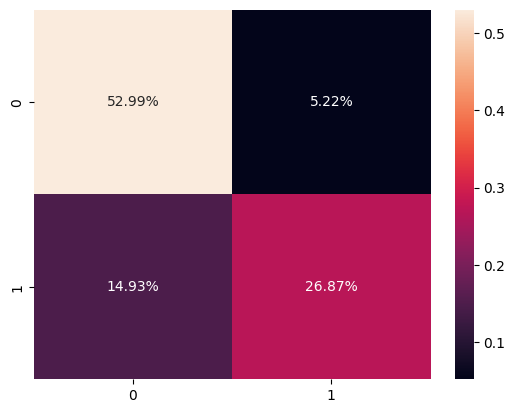

In [ ]:
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("accurancy_score",accuracy_score(y_test,y_pred))
conMat = confusion_matrix(y_test,y_pred)
print("precision",conMat[1][1]/(conMat[1][1]+conMat[0][1]))
print("recall_recore",conMat[1][1]/(conMat[1][1]+conMat[1][0]))
sns.heatmap(conMat/np.sum(conMat),annot=True,fmt='.2%')

